# **Eps2 - Data Understanding**

# 1. Load Data dan Library

a. Import Library dan Load Dataset

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/DATA MINING/Eps2-Data-train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


B. Cek isi dataset.

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Dokumentasi Tipe Data

a. Cek jumlah data

In [ ]:
data = pd.DataFrame(data)
print(data.shape)

(891, 12)


b. Cek tipe data

In [ ]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


c. Cek tipe data pada salah satu variabel/atribut

In [ ]:
print(data['Age'].dtypes)

float64


In [ ]:
print(data[['Age', 'Name', 'Sex']].dtypes)


Age     float64
Name     object
Sex      object
dtype: object


# **3. Exploratory Data Analysis (EDA)**

a. Pendekatan statistik sederhana

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b. Pendekatan visual

b.i. Distribusi data pada suatu variabel/atribut

,count
Survived,
0,549
1,342


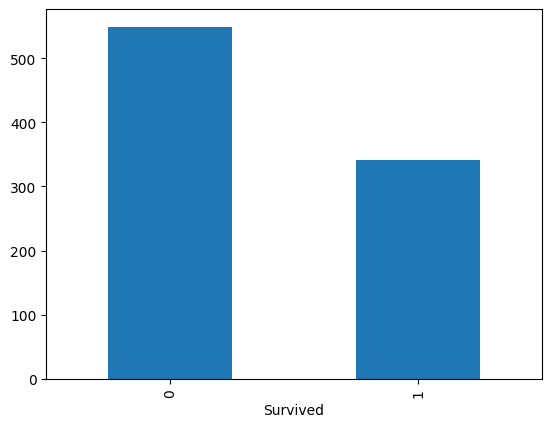

In [ ]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

b.ii. Perbandingan antar variabel/atribut

In [ ]:
def survival_stacked_bar(data, variable):
    died = data[data['Survived'] == 0][variable].value_counts() / len(data[data['Survived'] == 0])
    survived = data[data['Survived'] == 1][variable].value_counts() / len(data[data['Survived'] == 1])
    dataset = pd.DataFrame([died, survived])
    dataset.index = ['Meninggal', 'Selamat']
    dataset.plot(kind='bar', stacked=True, title='Prosentase')

    return dataset.head()

1. Stacked bar untuk menampilkan survival status berdasarkan `sex`

Sex,male,female
Meninggal,0.852459,0.147541
Selamat,0.318713,0.681287


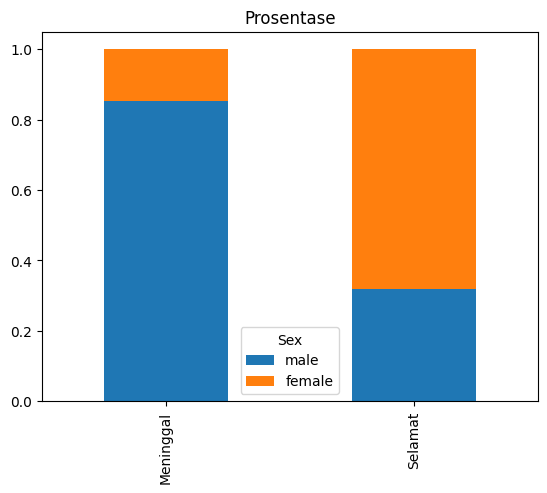

In [ ]:
survival_stacked_bar(data, 'Sex')

2. Stacked bar untuk menampilkan survival status berdasarkan `pClass`

Pclass,3,2,1
Meninggal,0.677596,0.176685,0.145719
Selamat,0.347953,0.254386,0.397661


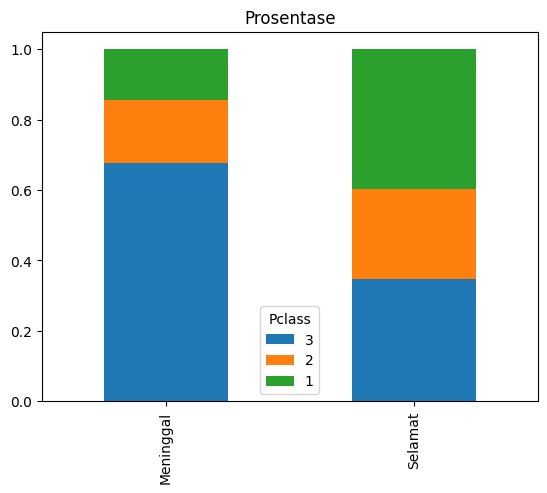

In [ ]:
survival_stacked_bar(data, 'Pclass')

3. Stacked bar untuk menampilkan survival status berdasarkan `Embarked`

Embarked,S,C,Q
Meninggal,0.777778,0.136612,0.085610
Selamat,0.634503,0.271930,0.087719


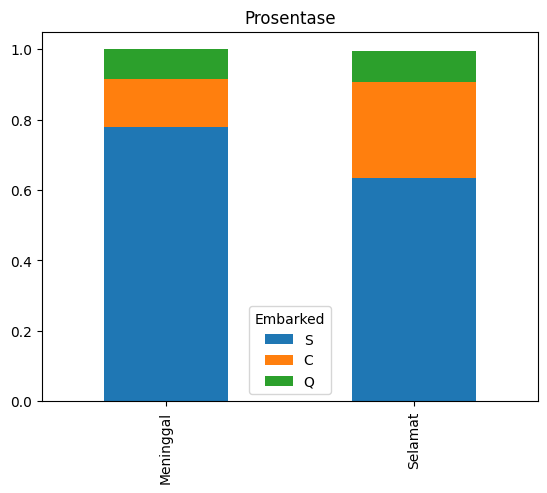

In [ ]:
survival_stacked_bar(data, 'Embarked')

4. Stacked bar untuk menampilkan survival status berdasarkan `ageGroup`

AgeGroup,Dewasa,Remaja,Anak-anak,Lansia
Meninggal,0.797170,0.094340,0.068396,0.040094
Selamat,0.741379,0.103448,0.137931,0.017241


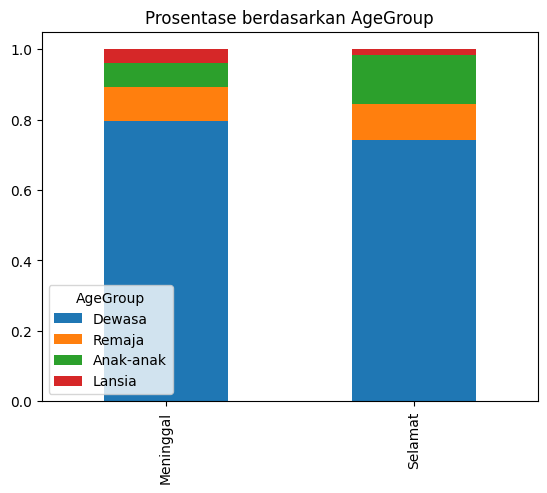

In [ ]:
def survival_stacked_bar(data, variable):
    bins = [0, 12, 18, 60, 100]
    labels = ['Anak-anak', 'Remaja', 'Dewasa', 'Lansia']
    if variable == 'Age':
        data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
        variable = 'AgeGroup'
    died = data[data['Survived'] == 0][variable].value_counts(normalize=True)
    survived = data[data['Survived'] == 1][variable].value_counts(normalize=True)
    dataset = pd.DataFrame([died, survived])
    dataset.index = ['Meninggal', 'Selamat']
    dataset.plot(kind='bar', stacked=True, title='Prosentase berdasarkan {}'.format(variable))
    return dataset.head()
survival_stacked_bar(data, 'Age')

# **4. Data Cleansing**

a. Data perlu dicek apakah terdapat data yang kosong atau tidak.

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


b. (opsional) Menunjukan berapa persen data yang hilang dari setiap row

In [ ]:
# data.isnull().mean() * 100
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage.apply(lambda x: '{:.2f}%'.format(x))
print(missing_percentage)


PassengerId     0.00%
Survived        0.00%
Pclass          0.00%
Name            0.00%
Sex             0.00%
Age            19.87%
SibSp           0.00%
Parch           0.00%
Ticket          0.00%
Fare            0.00%
Cabin          77.10%
Embarked        0.22%
AgeGroup       19.87%
dtype: object


c. (opsional)Nullity Matrix untuk menampilkan data null


<Axes: >

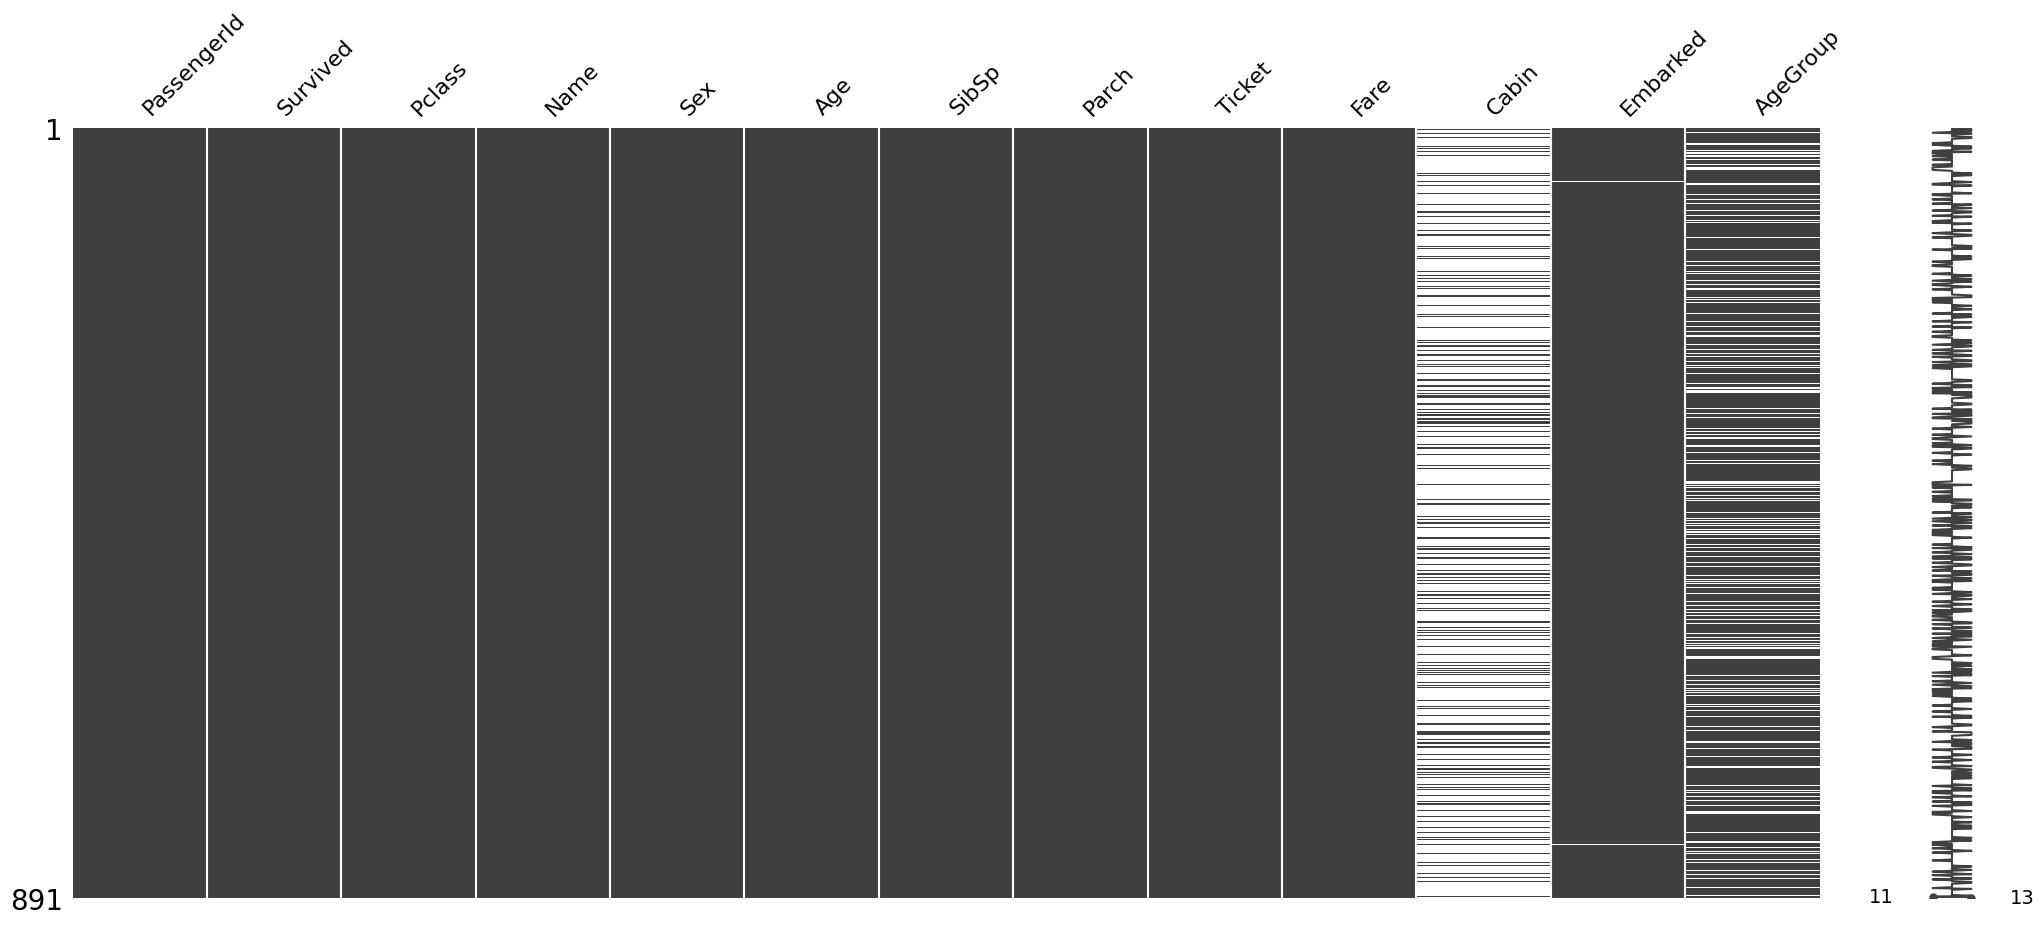

In [ ]:
 import missingno as msno
 msno.matrix(data)

d. Menghapus kolom `Cabin`

In [ ]:
data = data.drop(['Cabin'], axis=1)

e. Mengisi data (impute) `Age` menggunakan mean

In [ ]:
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_age)

f. Mengisi data `Embarked` menggunakan modus

In [ ]:
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

g. Mengecek data null setelah di cleaning

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


h. Export data cleaning

In [ ]:
from google.colab import files

data.to_csv('data_train_cleaned.csv')

files.download('data_train_cleaned.csv')